In [7]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
billion_df = pd.read_csv("Resources/billionaires.csv", index_col="rank", encoding='UTF-8')

billion_df.head()

,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
rank,,,,,,,,,,,,,,,,,,,,,
1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [8]:
industry_unique = billion_df['industries'].nunique()
print(f'According to the dataset, there are {industry_unique} industries that have produced billionaires.')

According to the dataset, there are 18 industries that have produced billionaires.


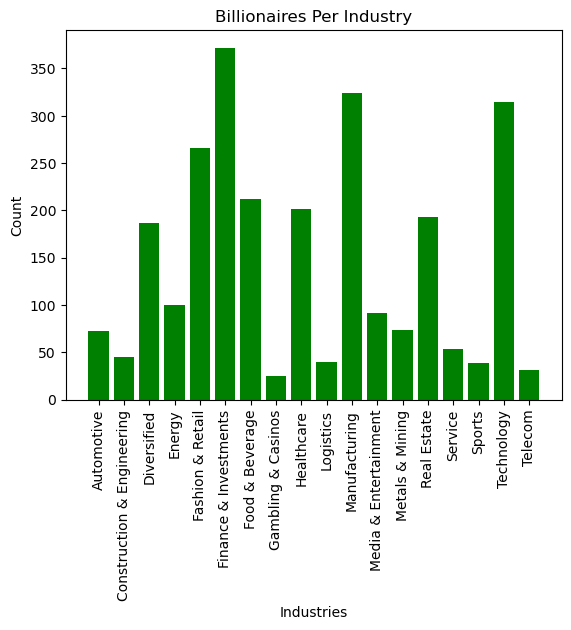

In [18]:
#Create bar chart for industries
industry_group = billion_df.groupby('industries')
industry_count = industry_group['personName'].count()
industry_count_df = pd.DataFrame(industry_count).rename(columns={'personName' : 'count'})
industry_count_df.reset_index(inplace=True)
x_axis = np.arange(industry_count_df['industries'].nunique())
plt.bar(x_axis, industry_count_df['count'], align='center', color='green')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, industry_count_df['industries'], rotation=90)
plt.xlabel('Industries')
plt.ylabel('Count')
plt.title('Billionaires Per Industry')
plt.savefig("output/Billionaires_Per_Industry_Bar.png")
plt.show()

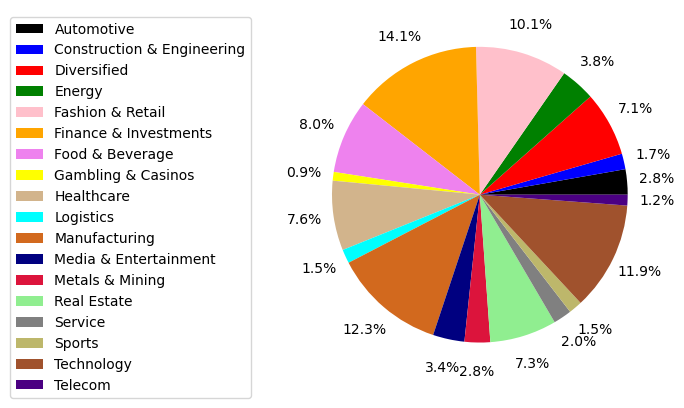

In [36]:
#Create pie chart for industries
labels = industry_count_df['industries']
colors = ['black','blue','red','green','pink','orange','violet','yellow','tan','cyan','chocolate','navy','crimson','lightgreen','grey','darkkhaki','sienna','indigo']
plt.pie(industry_count_df['count'], autopct='%1.1f%%', pctdistance=1.2, colors=colors)
#plt.ylabel('Industries')
plt.legend(labels, bbox_to_anchor=(-0.1, 1.))
plt.show()

In [54]:
bins = [1920, 1924.9, 1929.9, 1934.9, 1939.9, 1944.9, 1949.9, 1954.9, 1959.9, 1964.9, 1969.9, 1974.9, 1979.9, 1984.9, 1989.9, 1994.9, 1999.9, 2004.9]
group_names = ['1920-1924','1925-1929','1930-1934','1935-1939','1940-1944','1945-1949','1950-1954','1955-1959','1960-1964','1965-1969','1970-1974','1975-1979',
               '1980-1984','1985-1989','1990-1994','1995-1999','2000-2005']
year_df = billion_df.dropna(subset=['birthYear'])


# Slice the data and place it into bins
year_df["Birth Decade"] = pd.cut(year_df["birthYear"], 
                                              bins, labels=group_names, 
                                              include_lowest=True)
year_df

C:\Users\Matthew.Viola\AppData\Local\Temp\ipykernel_6364\1222146259.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df["Birth Decade"] = pd.cut(year_df["birthYear"],


,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,...,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,Birth Decade
rank,,,,,,,,,,,,,,,,,,,,,
1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,...,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749,1945-1949
2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1970-1974
3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1960-1964
4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1940-1944
5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1930-1934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,NaN,...,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,1970-1974
2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,NaN,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1940-1944
2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,NaN,...,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,1960-1964
